# 1. Image processing using histogram

In [2]:
import numpy as np
import cv2   as cv
import math
from IPython.display import Image
from matplotlib      import pyplot as plt
from collections     import Iterable

# Custom package
from helpers         import show_image_with_histogram

## Part 1: processing using histogram
### Excercise 1: mapping images to their histograms

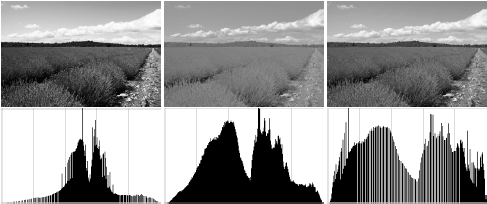

**From left to right images i1, i2 and i3, below them (same order) histogram h1, h2, and h3**

* Image i2 associated with histogram h2, given it has low intensity values (low key)
* Image i1 associated with histogram h3, given it is visually well balanced contains both low and high intensity values
* Image i3 associated with histogram h1, given it has mid range intensity values

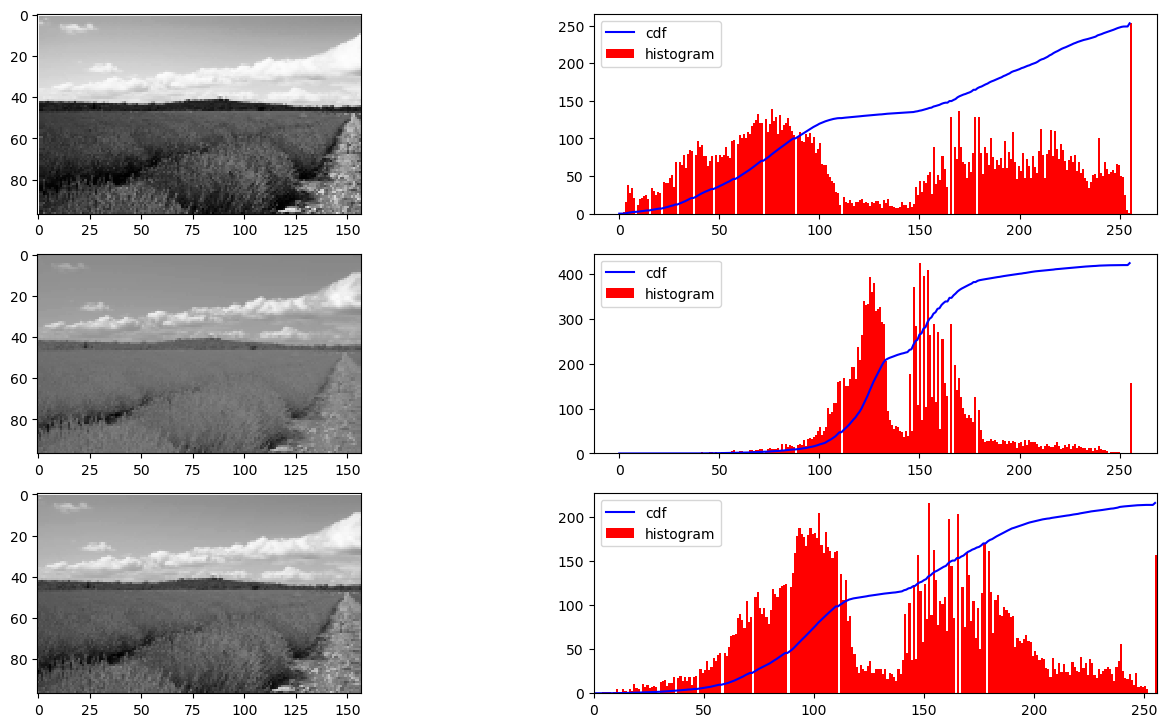

In [3]:
# Spliting and ploting the histogram of each sub pic
image = cv.imread('hist.png', 0)
height, width = image.shape
sub_height, sub_width = int(height/2), int(width/3)

offset = 5 # to account for space between pics.

images = (
    image[0:sub_height-offset, 0:sub_width-offset],
    image[0:sub_height-offset, sub_width+offset:sub_width*2],
    image[0:sub_height-offset, sub_width*2+offset:sub_width*3],
)

show_image_with_histogram(images, show_cdf=True)

### Excercise 2:

In [3]:
def histogramme(image):
    """
    Display the histogram of an image
    
    see helpers for a more sophisticated function

    Parameters
    ----------
    image : matrix of pixel
    """

    a = plt.hist(image.flatten(),256,[0,256])
    plt.figure(figsize=(5,5))
    plt.show()

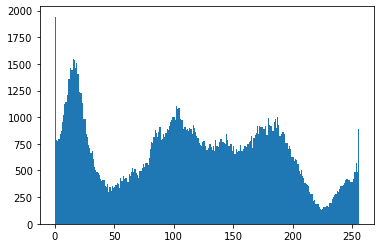

<Figure size 360x360 with 0 Axes>

In [4]:
# Testing the above function.
image = cv.imread('gray.jpg', 0)
histogramme(image)

### Excercise 3: Egalisation d’histogramme

**Translating the question into a mathematic problem results in finding the inverse of the function f(g)**

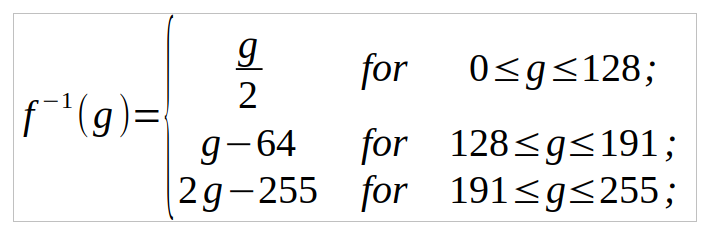

### Excercise 4

In [15]:
def lin_histo(image):
    # Implementation using numpy mask feature and lookup table
    hist, bins = np.histogram(image.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    return cdf[image]

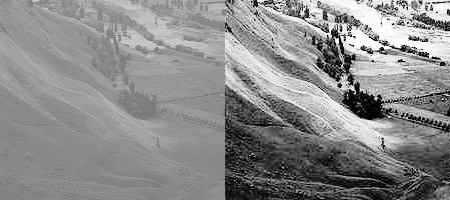

In [16]:
# Testing the function lin_hist
input_filename = 'test_clip.jpg'
output_filename = 'equalized.jpg'

img = cv.imread(input_filename,0)
equ = lin_histo(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv.imwrite(output_filename,res)
Image(output_filename)

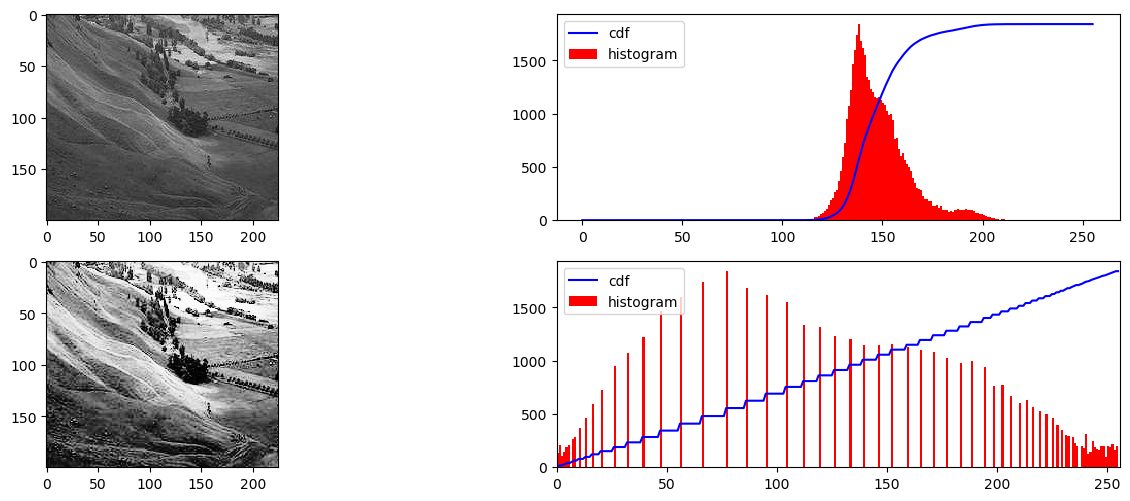

In [17]:
show_image_with_histogram([img,equ], show_cdf=True)

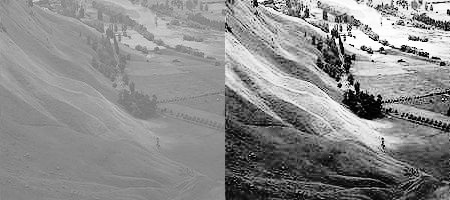

In [9]:
# OpenCV version
img = cv.imread(input_filename,0)
equ = cv.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv.imwrite(output_filename,res)
Image(output_filename)

## Part 2: Point processing

### Question 1

In [10]:
def Rdynamique(image):
    f_min, f_max = image.min(), image.max()
    coeffecient = (f_max - f_min) * 255

    return np.vectorize(lambda x: (x - f_min) * coeffecient)(image).astype('uint8')

In [11]:
%timeit t = Rdynamique(image)

905 ms ± 123 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


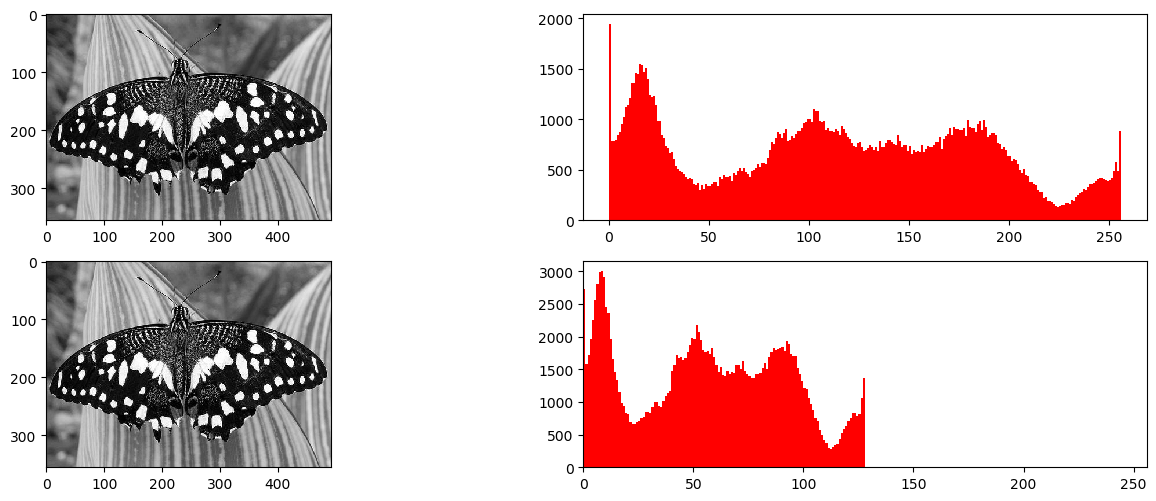

In [13]:
# Testing the function Rdynamic
# let's first make an image darker
image = cv.imread('gray.jpg', 0)

# reducing the intensity values of an image will result 
# of having low intensity values hence making an image darker
dark_image = np.vectorize(lambda x: int(x / 2))(image).astype('uint8')
show_image_with_histogram((image, dark_image))

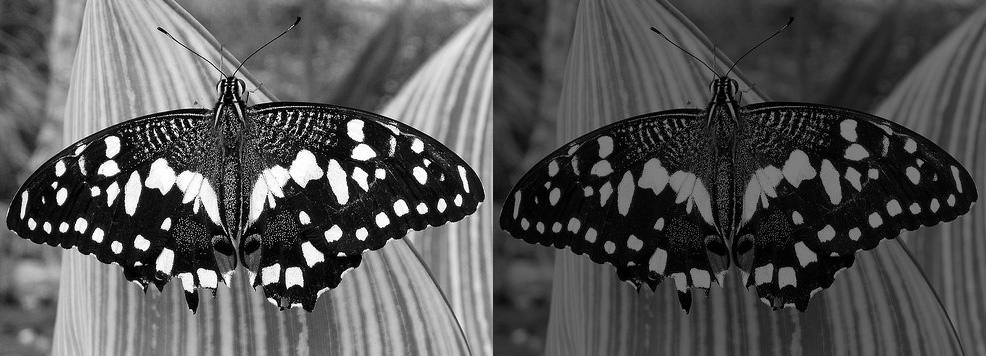

In [14]:
# Display the image side by side to validate visually the intended action (making the image darker)
output_filename = 'dark_image_comparaison.jpg'

res = np.hstack((image,dark_image)) #stacking images side-by-side
cv.imwrite(output_filename,res)
Image(output_filename)

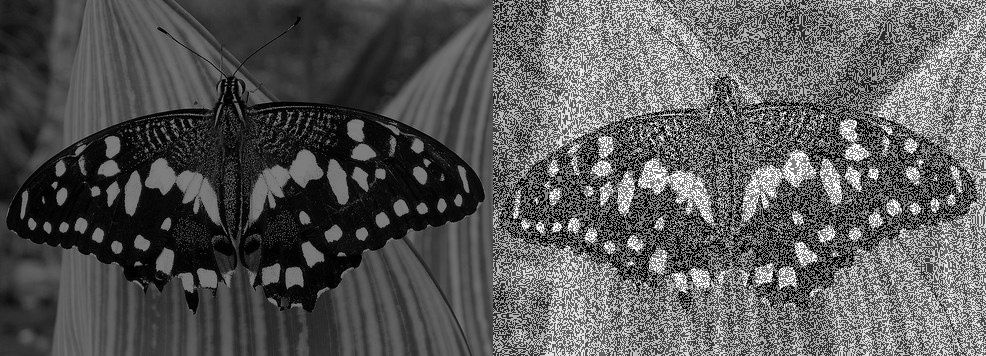

In [15]:
# Applying the function on the dark image
processed_image = Rdynamique(dark_image)

output_filename = 'r_dynamic_result.jpg'
stacked_pics = np.hstack((dark_image,processed_image)) #stacking images side-by-side
cv.imwrite(output_filename,stacked_pics)
Image(output_filename)

### Question 2

In [16]:
def test_point_enhancement_function(function, image):
    """
    Generic function to test an enhancement function that operates on pixels
    """

    enhanced_image = np.vectorize(function)(image).astype('uint8')

    output_filename = function.__name__ + '.jpg'
    print('From left to right, orginal and enhanced image')
    stacked_pics = np.hstack((image,enhanced_image)) #stacking images side-by-side
    cv.imwrite(output_filename,stacked_pics)
    return Image(output_filename)

### Multiplication by a constant

From left to right, orginal and enhanced image


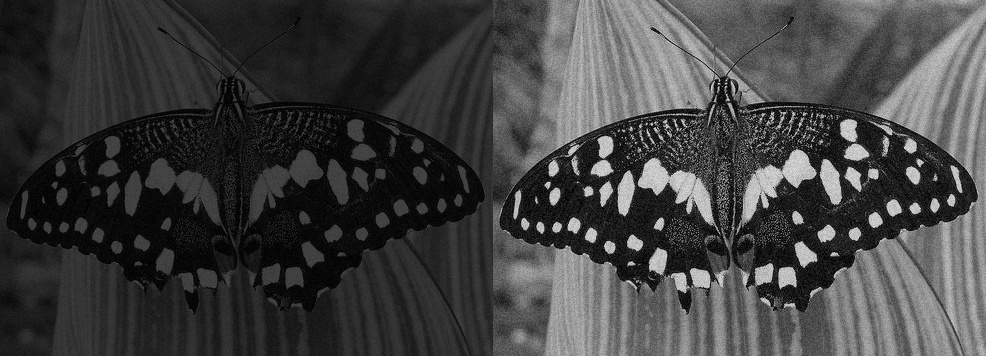

In [17]:
# based on the previous example a perfect use case for such a function is an image 
# with a low key or high key histogram

# orginal image
image = cv.imread('gray.jpg', 0)

# construct noise to add to orginal image
noise = np.zeros(image.shape, dtype=np.uint8)
noise = cv.randu(noise, 0, 10)

input_image = np.vectorize(lambda x: x / 4)(image).astype('uint8')

def constant_muliplication(x):
    return x * 3

test_point_enhancement_function(constant_muliplication, input_image + noise)

### Logarithmic correction

From left to right, orginal and enhanced image


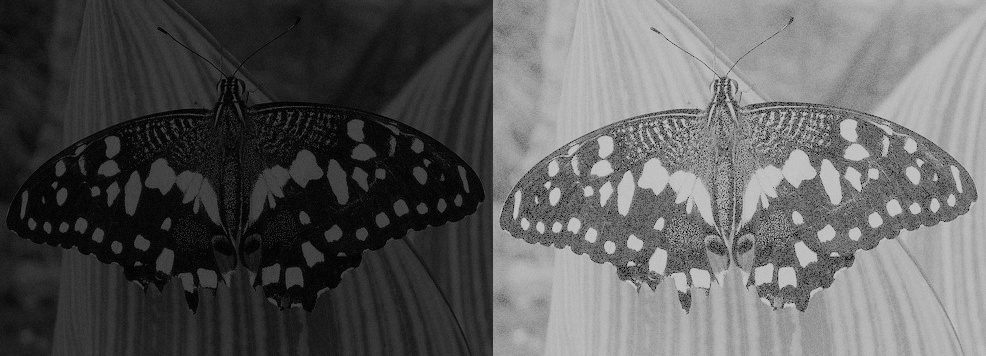

In [18]:
# As mentioned in the lecture this function stretches pale values and compress dark values

# orginal image
image = cv.imread('gray.jpg', 0)

# construct noise to add to orginal image
noise = np.zeros(image.shape, dtype=np.uint8)
noise = cv.randu(noise, 0, 10)

input_image = np.vectorize(lambda x: x / 4 )(image).astype('uint8')

def logarithm_correction(x):
    return 255 * math.log(x + 1) / math.log(256)

test_point_enhancement_function(logarithm_correction, input_image + noise)

### Gamma correction

From left to right, orginal and enhanced image


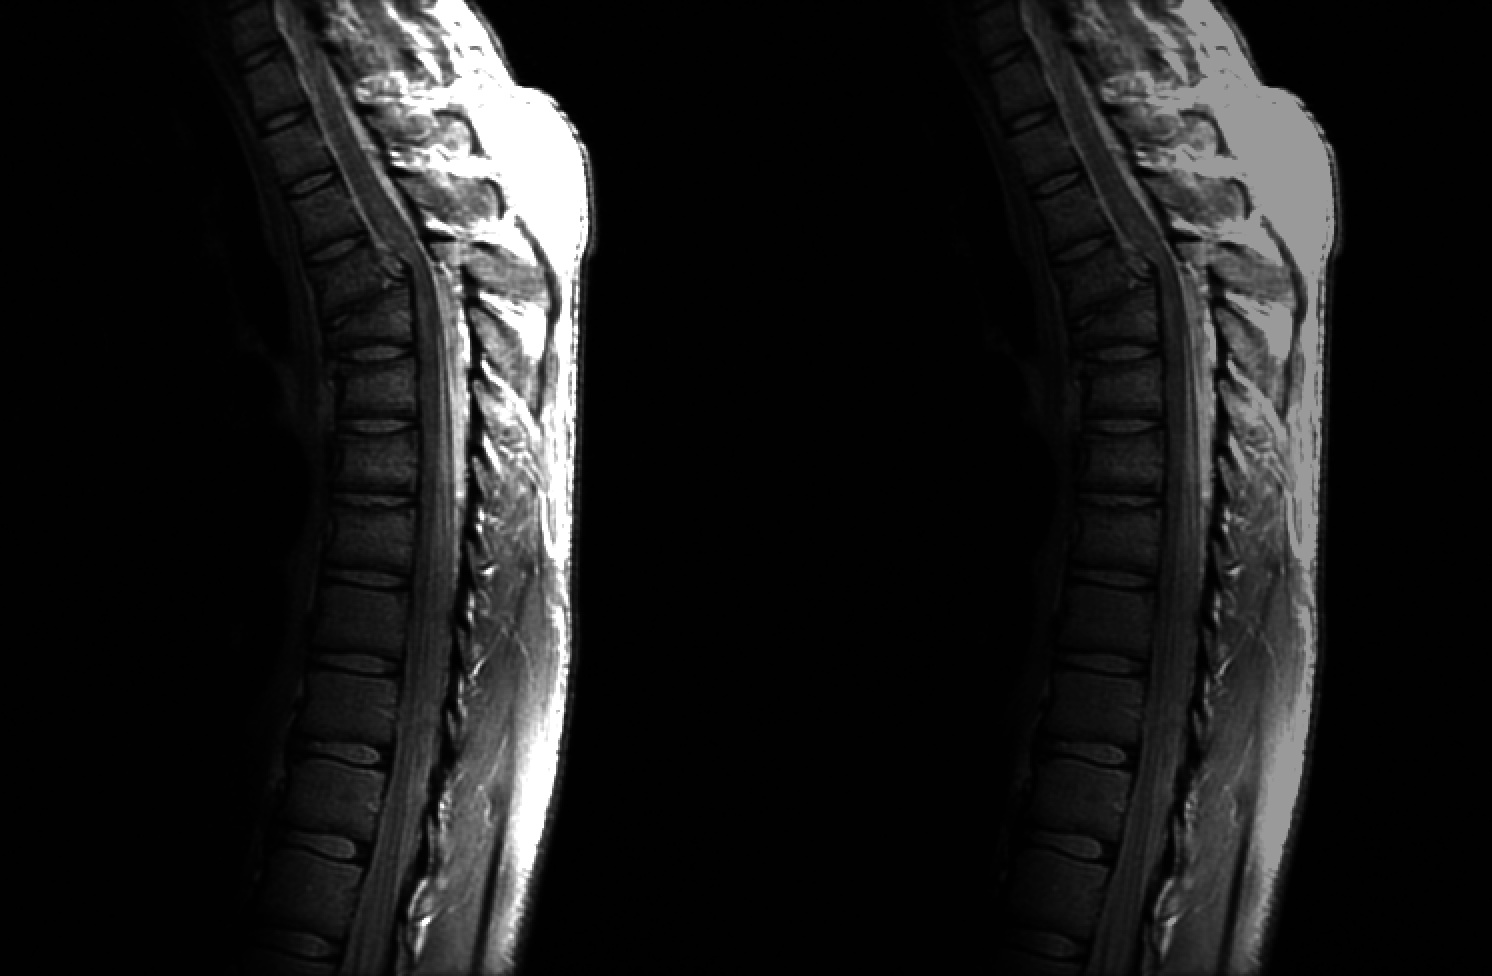

In [19]:
# orginal image
image = cv.imread('fractured_spine.tif', 0)

input_image = np.vectorize(lambda x: x / 4 )(image).astype('uint8')

gamma, c = 1.1, 1

def gamma_correction(x):
    return c * math.pow(x, 1 / gamma)

test_point_enhancement_function(gamma_correction, image)